In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch

from bo_functions import ExactGPModel
from bo_functions import train_GP_model
from bo_functions import eval_GP_components
from bo_functions import calc_ei_total_test
from bo_functions import create_y_data

from bo_plotters import plot_hyperparams
from bo_plotters import sse_plotter
from bo_plotters import stdev_plotter
from bo_plotters import ei_plotter_adv_test
from bo_plotters import ei_plotter
from bo_plotters import plot_xy
from bo_plotters import error_plotter_4D
from bo_plotters import y_plotter_4D
from bo_plotters import stdev_plotter_4D

In [2]:
#Pull x and Y data from CSV
#Pull x data from CSV
exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]

n = len(Xexp)
q = 3
# print(n)
Theta_True = np.array([1,-1])

In [3]:
#Create training and test data
train_data_doc = "train_3_in_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
# print(train_data)
train_theta = train_data[:,1:3]
train_p = torch.tensor(train_data[:,1:4])
train_y = torch.tensor(train_data[:,4])
# print(train_p)
# print(train_y)

In [4]:
#Create Meshgrid
p = 10
Theta1 = np.linspace(-2,2,p)
Theta2 = np.linspace(-2,2,p)

theta_mesh = np.array(np.meshgrid(Theta1,Theta2))
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]

Training Point EI: 0.000578173284595751
The GP estimates the highest EI is at Theta =  [ 2. -2.]  at iteration  1 

Training Point EI: 6.281735848885639e-07
The GP estimates the highest EI is at Theta =  [ 0.66666667 -1.55555556]  at iteration  2 

Training Point EI: 1.846660480979423e-05
The GP estimates the highest EI is at Theta =  [-2. -2.]  at iteration  3 

Training Point EI: 0.0017371000069285603
The GP estimates the highest EI is at Theta =  [1.11111111 0.22222222]  at iteration  4 

Training Point EI: 0.015060787507909734
The GP estimates the highest EI is at Theta =  [2. 2.]  at iteration  5 

Training Point EI: 0.0007053843234204327
The GP estimates the highest EI is at Theta =  [2.         0.22222222]  at iteration  6 

Training Point EI: 0.0006374556393718978
The GP estimates the highest EI is at Theta =  [-1.55555556  0.22222222]  at iteration  7 

Training Point EI: 0.0006426861332429201
The GP estimates the highest EI is at Theta =  [2.         1.11111111]  at iteration

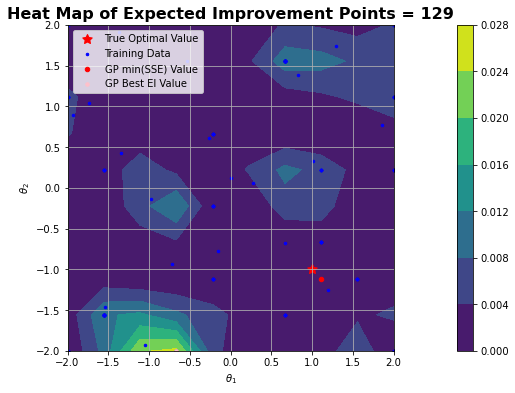

The GP estimates the highest EI is at Theta =  [-0.66666667 -2.        ]  at iteration  23 

Training Point EI: 8.794813148635394e-05
The GP estimates the highest EI is at Theta =  [-1.11111111 -2.        ]  at iteration  24 

Training Point EI: 8.977620064920533e-05


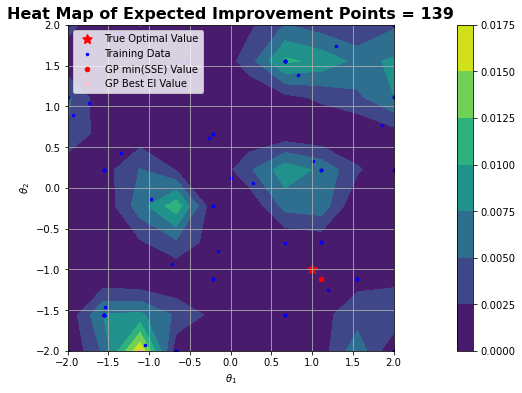

The GP estimates the highest EI is at Theta =  [-1.11111111 -2.        ]  at iteration  25 

Training Point EI: 8.989744136306266e-05


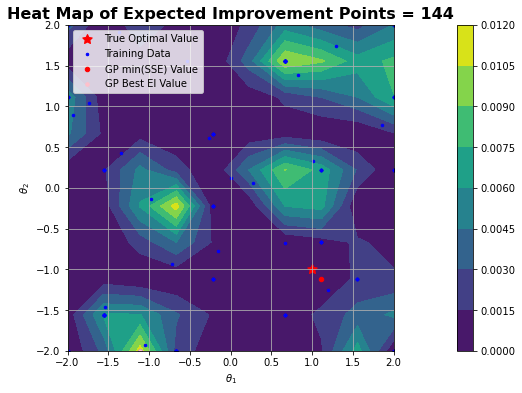

The GP estimates the highest EI is at Theta =  [-1.11111111 -2.        ]  at iteration  26 

Training Point EI: 8.997905045166066e-05
The GP estimates the highest EI is at Theta =  [-0.66666667 -0.22222222]  at iteration  27 

Training Point EI: 8.259691144618664e-05
The GP estimates the highest EI is at Theta =  [0.66666667 1.55555556]  at iteration  28 

Training Point EI: 7.274158833719957e-05
The GP estimates the highest EI is at Theta =  [0.66666667 0.22222222]  at iteration  29 

Training Point EI: 6.416624017116512e-05
The GP estimates the highest EI is at Theta =  [ 1.55555556 -2.        ]  at iteration  30 

Training Point EI: 6.488651578165361e-05


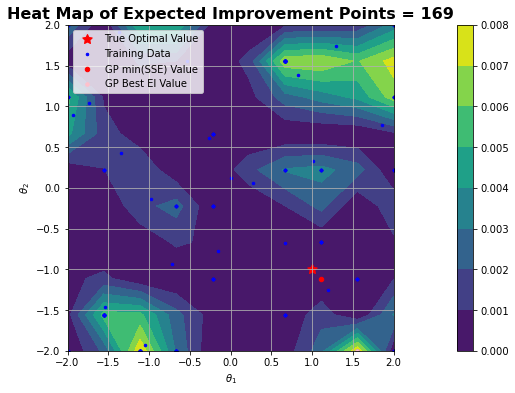

The GP estimates the highest EI is at Theta =  [ 1.55555556 -2.        ]  at iteration  31 

Training Point EI: 6.566538738295158e-05
The GP estimates the highest EI is at Theta =  [-1.11111111 -2.        ]  at iteration  32 

Training Point EI: 6.564237826670039e-05
The GP estimates the highest EI is at Theta =  [2.         1.55555556]  at iteration  33 

Training Point EI: 1.221500752145166e-05
The GP estimates the highest EI is at Theta =  [-0.66666667  2.        ]  at iteration  34 

Training Point EI: 9.11422421914776e-06
The GP estimates the highest EI is at Theta =  [-0.22222222  1.55555556]  at iteration  35 

Training Point EI: 1.0969476032421377e-05
The GP estimates the highest EI is at Theta =  [0.22222222 1.55555556]  at iteration  36 

Training Point EI: 1.063414531597695e-05
The GP estimates the highest EI is at Theta =  [ 1.55555556 -2.        ]  at iteration  37 

Training Point EI: 1.072853636543969e-05
The GP estimates the highest EI is at Theta =  [-2.         -0.666

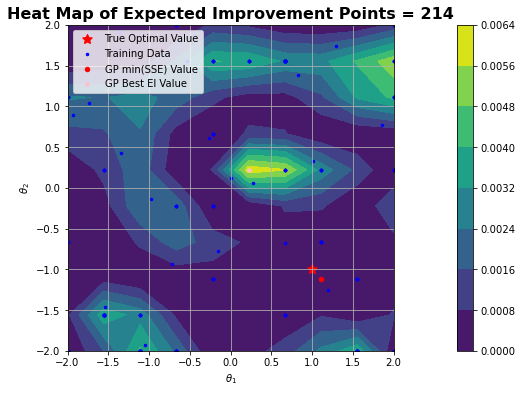

The GP estimates the highest EI is at Theta =  [0.22222222 0.22222222]  at iteration  40 



In [5]:
#Set number of training iterations and train GP
iterations = 500
BO_iters = 40
for i in range(BO_iters):
    if torch.is_tensor(train_p) != True:
        train_p = torch.from_numpy(train_p)
    if torch.is_tensor(train_y) != True:
        train_y = torch.from_numpy(train_y)
    
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    # We will use the simplest form of GP model, exact inference
    #Defines our model in terms of the class parameters in bo_functions
    model = ExactGPModel(train_p, train_y, likelihood)
    
    train_GP = train_GP_model(model,likelihood, train_p, train_y, iterations, verbose=False)
    noise_list = train_GP[0]
    lengthscale_list = train_GP[1]
    outputscale_list = train_GP[2]
    
#     #Plot hyperparameters vs iteration
#     noise_title = "Noise Hyperparameter"
#     lengthscale_title = "Lengthscale Hyperparameter"
#     outputscale_title = "Outputscale Hyperparameter"
#     plot_hyperparams(iterations, noise_list,noise_title)
#     plot_hyperparams(iterations, lengthscale_list,lengthscale_title)
#     plot_hyperparams(iterations, outputscale_list,outputscale_title)
    
    outputscale = torch.tensor([1])
    lengthscale = torch.tensor([1])
    noise = torch.tensor([0.1])

    model.likelihood.noise = noise
    model.covar_module.base_kernel.lengthscale =lengthscale
    model.covar_module.outputscale = outputscale
    
#     print("Noise Hyperparameter: ", float(model.likelihood.noise))
#     print("Lengthscale Hyperparameter: ", float(model.covar_module.base_kernel.lengthscale))
#     print("Outputscale Hyperparameter: ", float(model.covar_module.outputscale))
    
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval();
    
    #Will compare the rigorous solution and approximation later (multidimensional integral over each experiment using a sparse grid)
    #Calculate EI
    EI_Components = eval_GP_components(p,n,Xexp,Yexp, theta_mesh, model, likelihood)
    EI = EI_Components[0]
    SSE =EI_Components[1]
    y_GP = EI_Components[2]
    stdev_GP = EI_Components[3]
    error_GP = EI_Components[4]
    SSE_var_GP = EI_Components[5]
    ei_TP = EI_Components[6]
    print("Training Point EI:",ei_TP)
#     print(Error)

    #Finds the index where sse is the smallest and finds which Theta combination corresponds to that value
    argmin = np.array(np.where(np.isclose(SSE, np.amin(SSE),atol=np.amin(SSE)*1e-6)==True))
    Theta_1_Opt = float(theta1_mesh[argmin[0],argmin[1]])
    Theta_2_Opt = float(theta2_mesh[argmin[0],argmin[1]])
    Theta_Opt_GP = np.array((Theta_1_Opt,Theta_2_Opt))


    #calculates best theta value
    argmax = np.array(np.where(np.isclose(EI, np.amax(EI),atol=np.amax(EI)*1e-6)==True))
    #     print(argmax)
    Theta1_Best = float(theta1_mesh[argmax[0],argmax[1]])
    Theta2_Best = float(theta2_mesh[argmax[0],argmax[1]])
    Theta_Best = np.array((Theta1_Best,Theta2_Best))
    
    
#     If statement to show convergence
    Converge = np.allclose(Theta_Best, train_p[-1,0:2],atol=1e-10)
    if Converge == True or i ==BO_iters-1:
#         sse_plotter(theta_mesh, SSE, Theta_True, Theta_Opt_GP, Theta_Best,train_p,plot_train=True)
#         stdev_plotter(theta_mesh, SSE_var_GP, Theta_True, Theta_Opt_GP, Theta_Best, train_p,plot_train=True)
        ei_plotter(theta_mesh, EI, Theta_True, Theta_Opt_GP,Theta_Best,train_p,plot_train=True)
#         print("Final number of iterations: ", i+1)
#         print("The SSE at the GP mean is lowest at Theta =",Theta_Opt_GP)
#         print("The GP estimates the highest EI is at Theta = ",Theta_Best)
        
#         for j in range(n):
#             x = Xexp[j]
#             GP_mean = y_GP[argmin[0],argmin[1],j]
#             GP_var = (stdev_GP[argmin[0],argmin[1],j])**2
#             print("At Xexp = ",x,"the GP mean is ", GP_mean, "and the GP variance is", GP_var)
#         break
    
        
#     sse_plotter(theta_mesh, SSE, Theta_True, Theta_Opt_GP, Theta_Best,train_p,plot_train=True)
#     stdev_plotter(theta_mesh, SSE_var_GP, Theta_True, Theta_Opt_GP, Theta_Best, train_p,plot_train=True)
#     ei_plotter(theta_mesh, EI, Theta_True, Theta_Opt_GP, Theta_Best,train_p,plot_train=True)
#     print("The SSE at the GP mean is lowest at Theta =",Theta_Opt_GP, " at iteration ", i+1)
    print("The GP estimates the highest EI is at Theta = ",Theta_Best, " at iteration ", i+1, "\n")
#     for j in range(n):
#         x = Xexp[j]
#         GP_mean = y_GP[argmin[0],argmin[1],j]
#         GP_var = (stdev_GP[argmin[0],argmin[1],j])**2
#         print("At Xexp = ",x,"the GP mean is ", GP_mean, "and the GP variance is", GP_var)

    ##Append best values to training data 
    #Convert training data to numpy arrays to allow concatenation to work
    train_p = train_p.numpy() #(q x t)
    train_y = train_y.numpy() #(1 x t)
    
    #Loops over Xexp values
    for j in range(n):
#         print(train_y)
        ##Calculate y_Best and formal p_Best
        #Add 5 test points, same Theta1 and Theta2, but use all values of Xexp
        p_Best = np.array([Theta_Best[0],Theta_Best[1],Xexp[j]]) #(q x 1)
#         print(p_Best)
        y_Best = create_y_data(q,p_Best) #(1 x 1)
        
        #Add Theta_Best to train_p and y_best to train_y
        train_p = np.concatenate((train_p, [p_Best]), axis=0) #(q x t)
        train_y = np.concatenate((train_y, [y_Best]),axis=0) #(1 x t)




In [6]:
# EI_sing = calc_ei_total_test(p,n,Xexp,Yexp, theta_mesh, model, likelihood)[0]
# Error =calc_ei_total_test(p,n,Xexp,Yexp, theta_mesh, model, likelihood)[1]
# for i in range(n):    
#     ei_plotter_adv_test(theta_mesh, EI_sing[i], Theta_True, train_p,Xexp[i],Theta_Opt_GP,plot_train=True)

[ 1.11111111 -1.11111111]


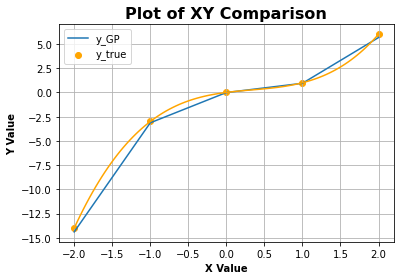

In [10]:
#Plot xy data
title = "XY Comparison"
y_GP_Opt = y_GP[argmin[0],argmin[1],:][0]
print(Theta_Opt_GP)
plot_xy(Xexp, Yexp, y_GP_Opt,Theta_True,title)

In [8]:
mesh_3D = np.meshgrid(Theta1,Theta2,Xexp)

## Analysis of Standard Deviation
 - The GP estimates that the standard deviation is lowest at points that were directly tested
  - This can be rationalized by the way that the contour plot is drawn
 - Standard deviation is smallest away from the edges and larger towards them
  - This is rationalized by the fact that there are less neighbors that the GP is tested and trained with at the boundaries
 - The more points that get tested, the more the standard deviations will decrease

## Analysis of Error Squared Magnitude
 - The GP emulator is most inaccurate when all values of $\bar{p}$ are at their extreme points 
  - In general, the GP is less accurate at extreme points, this is rationalized by the fact that there are less neighbors that the GP is tested and trained with at the boundaries
 - The GP emulator is most accurate after convergence
 - GP error is mostly very low, as more iterations are added, error decreases

## Analysis of GP Emulator (Model y)
 - The GP emulator correctly captures that y increases as $\bar{p}$ increases. This tells us that this GP emulator model could be viable
  - The GP emulator suitably estimates where the lowest y is achieved and the actual value of y
  - Slight error leads to small inaccuracies in the value of $\bar{\theta}$ and the values of y